## Load data

In [16]:
import pandas as pd

# Load
file_path = 'user-testing.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows to verify the data loaded correctly
data.head()

,test_id,task-1-answer,task-1-time,task-1-q1,task-1-q2,task-2-answer,task-2-time,task-2-q1,task-2-q2,task-2-q3,...,task-7-q3,task-7-q4,task-7-q5,task-7-q6,task-7-q7,task-8-time,task-8-answer,task-8-q1,task-8-q2,task-8-q3
0,1,I think it is about car racing. You can click ...,11,No,No,Completed,37,No,Yes,No,...,Yes,Don't know,Click on the name,Go back to leaderboard,No,25,Feels natural,Yes,No,Yes it adds to my engagement
1,2,I think it is about formula1. You can click th...,5,"Yes, could add in constructor and driver champ...",No,Completed,10,Yes,Yes,No,...,Yes,Don't know,Click on the name,Go back to leaderboard,No,31,Feel a little unnatural,Kind of,Kind of,It's cool
2,3,I think it is about formula1. I can click on t...,8,"Yes, could add in constructor and driver champ...",No,Completed,11,Yes,Yes,No,...,Yes,Don't know,Click on the name,Go back to leaderboard,No,29,It works well on the left side,Kind of,Yes,It's a nice feature
3,4,I think it is about formula1. You can click th...,6,"Yes, photos",No,Completed,40,No,Yes,No,...,Yes,Green=podium. red=winner. fastest lap=orange,Click on the name,Go back to leaderboard,No,15,Feels natural,Yes,No,It's cool
4,5,I think it is about formula1. I can click on t...,10,"Yes, could add in constructor and driver champ...",No,Completed,25,Yes,Yes,No,...,Yes,Green=podium. red=winner. fastest lap=orange,Don't know,Go back to leaderboard,No,10,Feels natural,Yes,No,It's cool


---
## Task 1: Navigating the Home Screen 

### Goal: Check if users can easily find and interpret information on the Home Screen. 

### Instructions: “Please start by exploring the Home Screen. What do you think this website is about? Which elements do you think are clickable?” 

#### Follow-up Questions: 

- Do you feel like anything is missing on the home screen? 

- Was anything confusing about the layout or design? 

In [17]:
# Identify Task 1 columns
task1_columns = [col for col in data.columns if col.startswith('task-1')]

# Extract Task 1 data
task1_data = data[['test_id'] + task1_columns]

# Display the first few rows
task1_data.head()

,test_id,task-1-answer,task-1-time,task-1-q1,task-1-q2
0,1,I think it is about car racing. You can click ...,11,No,No
1,2,I think it is about formula1. You can click th...,5,"Yes, could add in constructor and driver champ...",No
2,3,I think it is about formula1. I can click on t...,8,"Yes, could add in constructor and driver champ...",No
3,4,I think it is about formula1. You can click th...,6,"Yes, photos",No
4,5,I think it is about formula1. I can click on t...,10,"Yes, could add in constructor and driver champ...",No


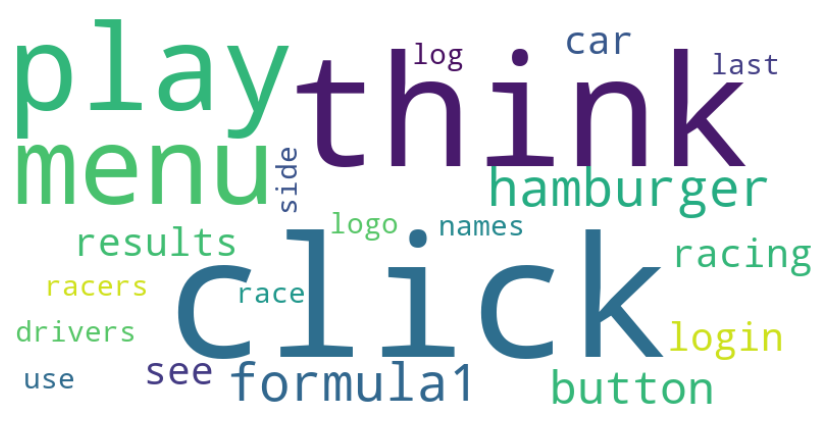

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text responses into one string
text = ' '.join(task1_data['task-1-answer'].astype(str))

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [19]:
from collections import Counter
import re

# Clean and tokenize the text
words = re.findall(r'\w+', text.lower())

# Remove common stop words
stop_words = set(['the', 'and', 'to', 'you', 'can', 'i', 'is', 'on', 'it', 'of', 'a', 'about'])

filtered_words = [word for word in words if word not in stop_words]

# Count word frequencies
word_counts = Counter(filtered_words)

# Display the most common words
word_counts.most_common(10)


[('click', 7),
 ('think', 6),
 ('play', 6),
 ('menu', 5),
 ('hamburger', 4),
 ('formula1', 4),
 ('button', 3),
 ('car', 2),
 ('racing', 2),
 ('results', 2)]

In [20]:
# Calculate descriptive statistics
task1_time_stats = task1_data['task-1-time'].describe()
print(task1_time_stats)

count     6.000000
mean      8.333333
std       2.422120
min       5.000000
25%       6.500000
50%       9.000000
75%      10.000000
max      11.000000
Name: task-1-time, dtype: float64


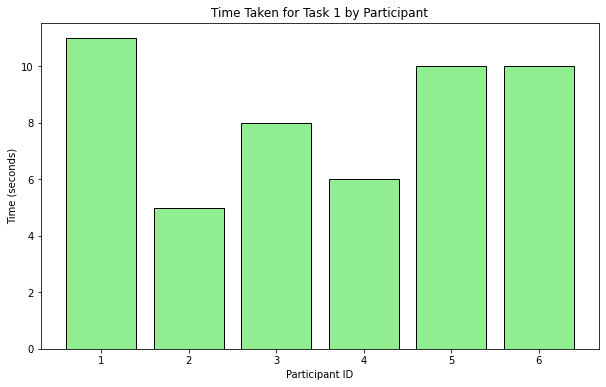

In [42]:
# Plot a bar chart of task times per participant
plt.figure(figsize=(10, 6))
plt.bar(task1_data['test_id'], task1_data['task-1-time'], edgecolor='black', color='lightgreen')
plt.title('Time Taken for Task 1 by Participant')
plt.xlabel('Participant ID')
plt.ylabel('Time (seconds)')
plt.xticks(task1_data['test_id'])
plt.show()

In [22]:
# Question 1 responses
q1_counts = task1_data['task-1-q1'].value_counts()
print("Question 1 Responses:")
print(q1_counts)

# Question 2 responses
q2_counts = task1_data['task-1-q2'].value_counts()
print("\nQuestion 2 Responses:")
print(q2_counts)

Question 1 Responses:
Yes, could add in constructor and driver championships    3
No                                                        1
Yes, photos                                               1
Missing different types of f1 leagues.                    1
Name: task-1-q1, dtype: int64

Question 2 Responses:
No    6
Name: task-1-q2, dtype: int64


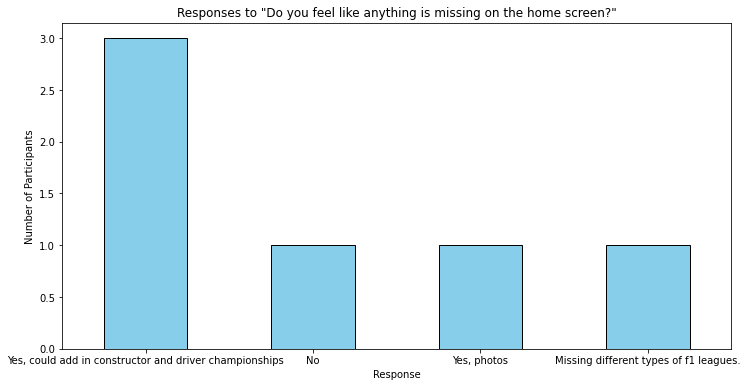

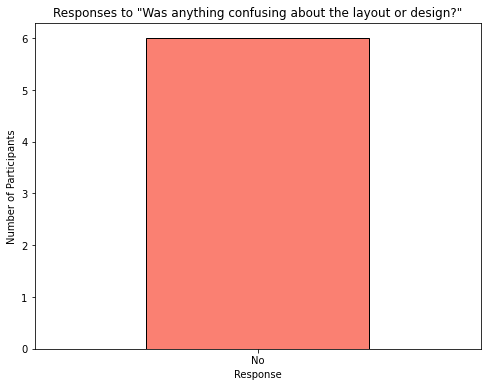

In [29]:
# Plot for Question 1
plt.figure(figsize=(12, 6))
q1_counts.plot(kind='bar', edgecolor='black', color='skyblue')
plt.title('Responses to "Do you feel like anything is missing on the home screen?"')
plt.xlabel('Response')
plt.ylabel('Number of Participants')
plt.xticks(rotation=0)
plt.show()

# Plot for Question 2
plt.figure(figsize=(8, 6))
q2_counts.plot(kind='bar', edgecolor='black', color='salmon')
plt.title('Responses to "Was anything confusing about the layout or design?"')
plt.xlabel('Response')
plt.ylabel('Number of Participants')
plt.xticks(rotation=0)
plt.show()


---
## Task 2: Viewing Results of the First Race of the Current Season 

### Goal: Evaluate if users can easily find and view the results for the first race of the current Formula 1 season. 

### Instructions: “Please find the results for the first race of this Formula 1 season. Describe the information you see for this race, like the winning driver, team, or points earned.” 

#### Follow-up Questions: 

- Were you able to find the first race’s results quickly? 

- Was the information displayed in a way that was easy to understand? 

- Was there anything confusing or unexpected about how the race results were organized? 

- Do you feel like you learned enough from this screen, or would you want more details? 

In [30]:
# Identify Task 2 columns
task2_columns = [col for col in data.columns if col.startswith('task-2')]

# Extract Task 2 data
task2_data = data[['test_id'] + task2_columns]

# Display the first few rows
task2_data.head()

,test_id,task-2-answer,task-2-time,task-2-q1,task-2-q2,task-2-q3,task-2-q4
0,1,Completed,37,No,Yes,No,There is enough information
1,2,Completed,10,Yes,Yes,No,There is enough information
2,3,Completed,11,Yes,Yes,No,There is enough information
3,4,Completed,40,No,Yes,No,There is enough information
4,5,Completed,25,Yes,Yes,No,There is enough information


In [33]:
# Calculate descriptive statistics
task2_time_stats = task2_data['task-2-time'].describe()
print("Descriptive statistics for Task 2 completion time:")
print(task2_time_stats)

Descriptive statistics for Task 2 completion time:
count     6.000000
mean     22.500000
std      13.575714
min      10.000000
25%      11.250000
50%      18.500000
75%      34.000000
max      40.000000
Name: task-2-time, dtype: float64


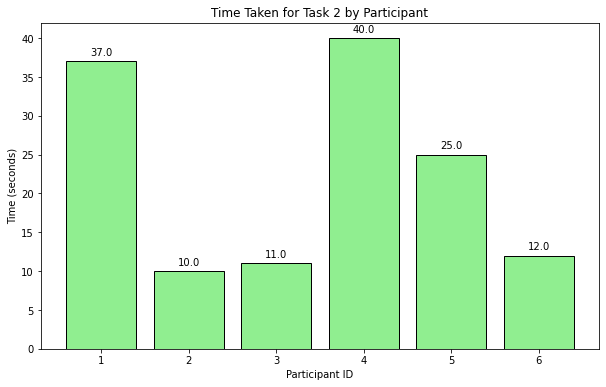

In [40]:
# Plot a bar chart of task times per participant
plt.figure(figsize=(10, 6))
bars = plt.bar(task2_data['test_id'], task2_data['task-2-time'], edgecolor='black', color='lightgreen')
plt.title('Time Taken for Task 2 by Participant')
plt.xlabel('Participant ID')
plt.ylabel('Time (seconds)')
plt.xticks(task2_data['test_id'])

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.5, f'{yval:.1f}', ha='center', va='bottom')

plt.show()


Responses to: Were you able to find the first race’s results quickly?
Yes    4
No     2
Name: task-2-q1, dtype: int64


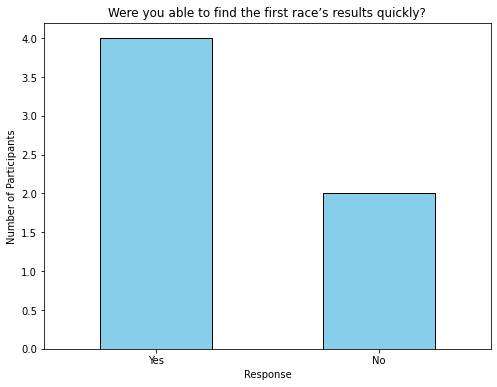


Responses to: Was the information displayed in a way that was easy to understand?
Yes    6
Name: task-2-q2, dtype: int64


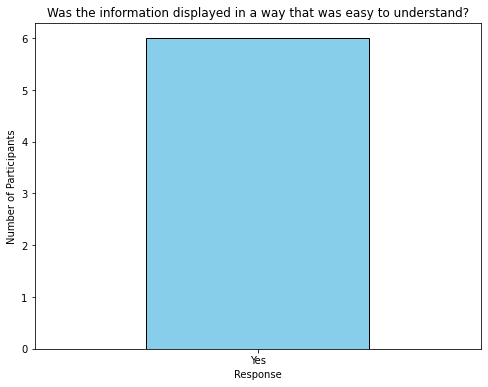


Responses to: Was there anything confusing or unexpected about how the race results were organized?
No    6
Name: task-2-q3, dtype: int64


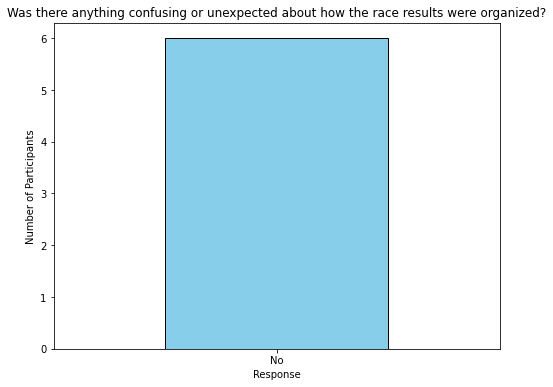


Responses to: Do you feel like you learned enough from this screen, or would you want more details?
There is enough information        5
Missing time for finishing race    1
Name: task-2-q4, dtype: int64


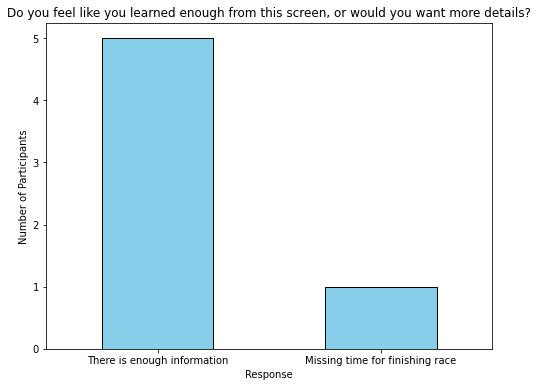

In [35]:
# List of follow-up questions
questions = {
    'task-2-q1': "Were you able to find the first race’s results quickly?",
    'task-2-q2': "Was the information displayed in a way that was easy to understand?",
    'task-2-q3': "Was there anything confusing or unexpected about how the race results were organized?",
    'task-2-q4': "Do you feel like you learned enough from this screen, or would you want more details?"
}

# Analyze responses
for col, question in questions.items():
    print(f"\nResponses to: {question}")
    counts = task2_data[col].value_counts()
    print(counts)

    # Plot the responses
    plt.figure(figsize=(8, 6))
    counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(question)
    plt.xlabel('Response')
    plt.ylabel('Number of Participants')
    plt.xticks(rotation=0)
    plt.show()

---
## Task 3: Viewing Results for Max Verstappen in the 2022 Formula 1 Season 

### Goal: Evaluate if users can easily find and view Max Verstappen's performance in each race of the 2022 season. 

### Instructions: “Please find the results for Max Verstappen across all races in the 2022 Formula 1 season.” 

#### Follow-up Questions: 

- Were you able to find Max Verstappen's race results for 2022 quickly? 

- Can you think of another way to reach this screen from the previous one (race results screen)? 

- Was the information displayed in a way that was easy to understand and follow across multiple races? 

- Was there anything confusing or unexpected about how his results were organized? 

- Do you feel like the information provided for each race is sufficient, or would you prefer additional details? 

In [37]:
# Identify Task 3 columns
task3_columns = [col for col in data.columns if col.startswith('task-3')]

# Extract Task 3 data
task3_data = data[['test_id'] + task3_columns]

# Display the first few rows
task3_data.head()

,test_id,task-3-time,task-3-answer,task-3-q1,task-3-q2,task-3-q3,task-3-q4,task-3-q5
0,1,10,Completed,Yes,Yes,Yes,No,It's enough
1,2,15,Completed,Yes,No,Yes,No,It's enough
2,3,13,Completed,Yes,No,Yes,No,It's enough
3,4,3,Completed,Yes,Yes,Yes,No,It's enough
4,5,20,Completed,Yes,Yes,Yes,No,It's enough


In [38]:
# Calculate descriptive statistics
task3_time_stats = task3_data['task-3-time'].describe()
print("Descriptive statistics for Task 3 completion time:")
print(task3_time_stats)

Descriptive statistics for Task 3 completion time:
count     6.000000
mean     12.666667
std       5.750362
min       3.000000
25%      10.750000
50%      14.000000
75%      15.000000
max      20.000000
Name: task-3-time, dtype: float64


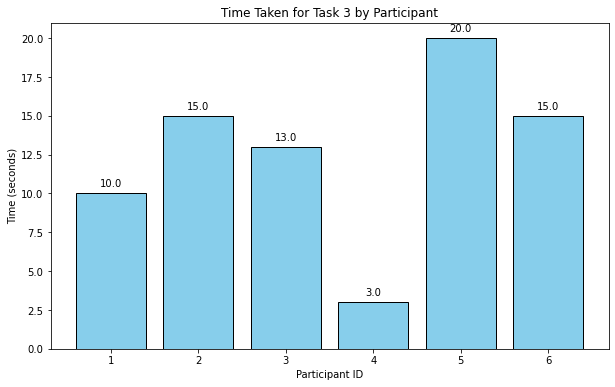

In [39]:
import matplotlib.pyplot as plt

# Plot a bar chart of task times per participant
plt.figure(figsize=(10, 6))
bars = plt.bar(task3_data['test_id'], task3_data['task-3-time'], edgecolor='black', color='skyblue')
plt.title('Time Taken for Task 3 by Participant')
plt.xlabel('Participant ID')
plt.ylabel('Time (seconds)')
plt.xticks(task3_data['test_id'])

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.3, f'{yval:.1f}', ha='center', va='bottom')

plt.show()


Responses to: Were you able to find Max Verstappen's race results for 2022 quickly?
Yes    6
Name: task-3-q1, dtype: int64


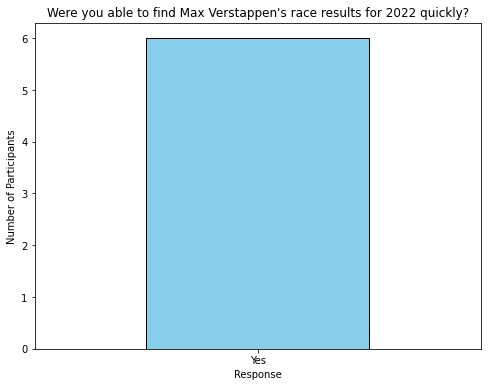


Responses to: Can you think of another way to reach this screen from the previous one (race results screen)?
Yes    4
No     2
Name: task-3-q2, dtype: int64


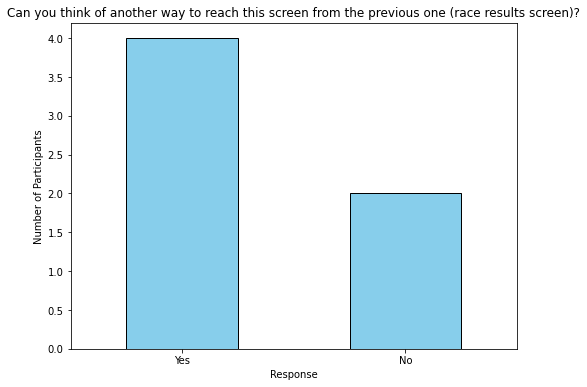


Responses to: Was the information displayed in a way that was easy to understand and follow across multiple races?
Yes    6
Name: task-3-q3, dtype: int64


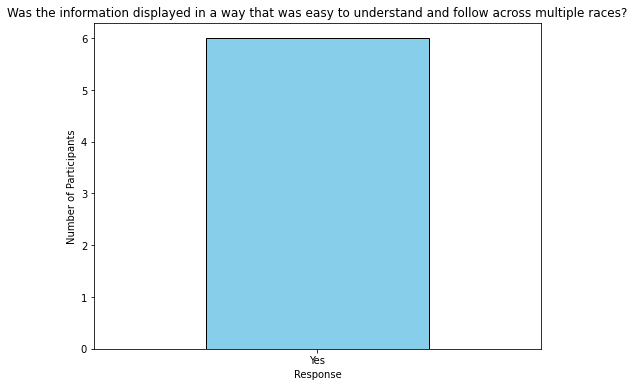


Responses to: Was there anything confusing or unexpected about how his results were organized?
No    6
Name: task-3-q4, dtype: int64


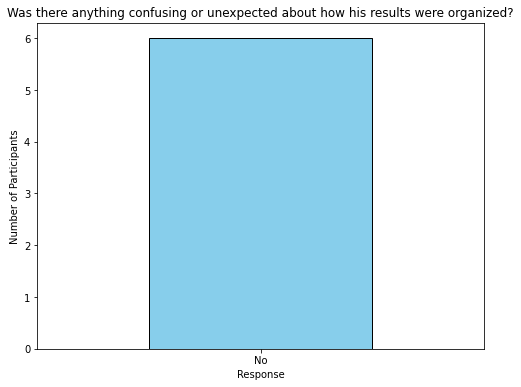


Responses to: Do you feel like the information provided for each race is sufficient, or would you prefer additional details?
It's enough    6
Name: task-3-q5, dtype: int64


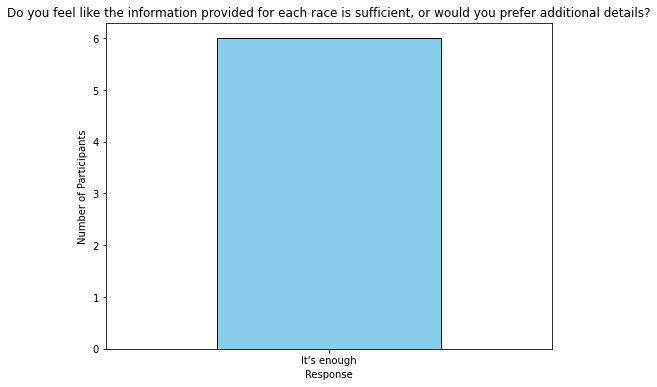

In [43]:
# List of follow-up questions
questions = {
    'task-3-q1': "Were you able to find Max Verstappen's race results for 2022 quickly?",
    'task-3-q2': "Can you think of another way to reach this screen from the previous one (race results screen)?",
    'task-3-q3': "Was the information displayed in a way that was easy to understand and follow across multiple races?",
    'task-3-q4': "Was there anything confusing or unexpected about how his results were organized?",
    'task-3-q5': "Do you feel like the information provided for each race is sufficient, or would you prefer additional details?"
}

# Analyze responses
for col, question in questions.items():
    print(f"\nResponses to: {question}")
    counts = task3_data[col].value_counts()
    print(counts)
    
    # Plot the responses
    plt.figure(figsize=(8, 6))
    counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(question)
    plt.xlabel('Response')
    plt.ylabel('Number of Participants')
    plt.xticks(rotation=0)
    plt.show()

---
## Task 4: Viewing Teams and Points for Racing Point in the 2020 Formula 1 Season 

### Goal: Assess if users can easily find the list of teams in the 2020 season and view the points earned by Racing Point during that season. 

### Instructions: “Please find the list of teams for the 2020 Formula 1 season, and locate the total points earned by Racing Point in that season. Describe any additional details you see related to Racing Point’s performance.” 

#### Follow-up Questions: 

- Were you able to find the team list for 2020 and Racing Point’s points quickly? 

- Was the information about Racing Point's performance displayed in a way that was easy to understand? 

- Was there anything confusing or unexpected about how the team and points information was organized? 

- Do you feel like the information provided for Racing Point's performance is sufficient, or would you like more details? 

In [45]:
# Identify Task 4 columns
task4_columns = [col for col in data.columns if col.startswith('task-4')]

# Extract Task 4 data
task4_data = data[['test_id'] + task4_columns]

# Display the first few rows
task4_data.head()

,test_id,task-4-time,task-4-answer,task-4-q1,task-4-q2,task-4-q3,task-4-q4
0,1,10,Completed,Yes,Yes,No,It's enough
1,2,15,Completed,Yes,Yes,No,It's enough
2,3,11,Completed,Yes,Yes,No,It's enough
3,4,7,Completed,Yes,Yes,No,Could add team logos
4,5,10,Completed,Yes,Yes,No,It's enough


In [46]:
# Calculate descriptive statistics
task4_time_stats = task4_data['task-4-time'].describe()
print("Descriptive statistics for Task 4 completion time:")
print(task4_time_stats)

Descriptive statistics for Task 4 completion time:
count     6.000000
mean     10.333333
std       2.658320
min       7.000000
25%       9.250000
50%      10.000000
75%      10.750000
max      15.000000
Name: task-4-time, dtype: float64


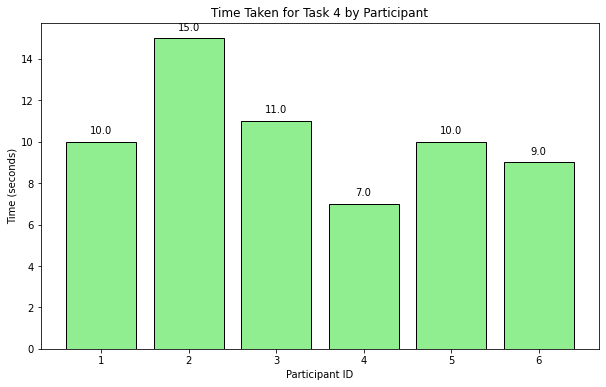

In [48]:
import matplotlib.pyplot as plt

# Plot a bar chart of task times per participant
plt.figure(figsize=(10, 6))
bars = plt.bar(task4_data['test_id'], task4_data['task-4-time'], edgecolor='black', color='lightgreen')
plt.title('Time Taken for Task 4 by Participant')
plt.xlabel('Participant ID')
plt.ylabel('Time (seconds)')
plt.xticks(task4_data['test_id'])

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.3, f'{yval:.1f}', ha='center', va='bottom')

plt.show()


Responses to: Were you able to find the team list for 2020 and Racing Point’s points quickly?
Yes    6
Name: task-4-q1, dtype: int64


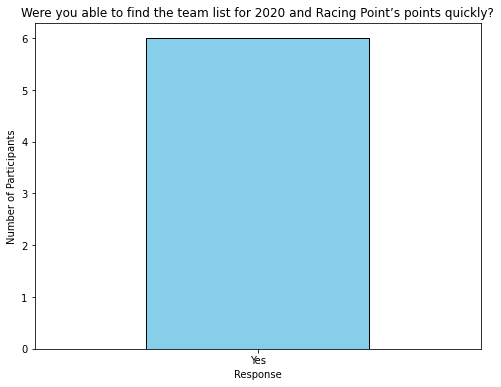


Responses to: Was the information about Racing Point's performance displayed in a way that was easy to understand?
Yes    6
Name: task-4-q2, dtype: int64


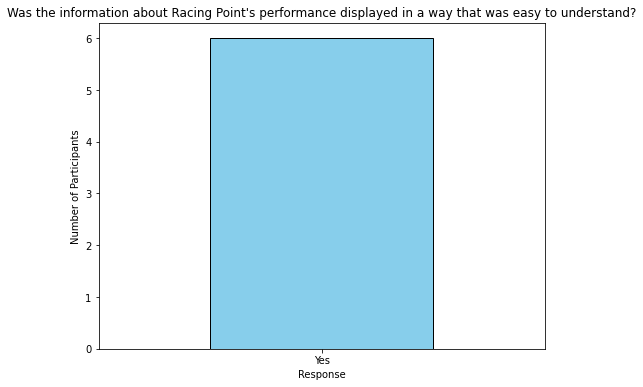


Responses to: Was there anything confusing or unexpected about how the team and points information was organized?
No    6
Name: task-4-q3, dtype: int64


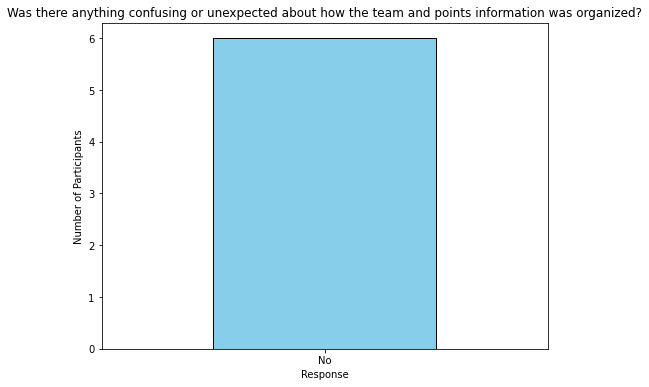


Responses to: Do you feel like the information provided for Racing Point's performance is sufficient, or would you like more details?
It's enough             5
Could add team logos    1
Name: task-4-q4, dtype: int64


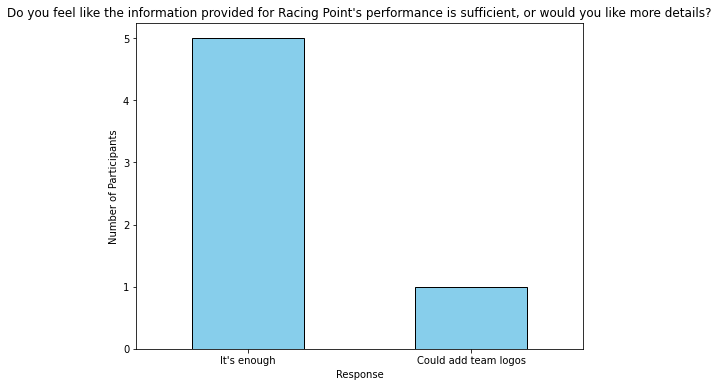

In [49]:
# List of follow-up questions
questions = {
    'task-4-q1': "Were you able to find the team list for 2020 and Racing Point’s points quickly?",
    'task-4-q2': "Was the information about Racing Point's performance displayed in a way that was easy to understand?",
    'task-4-q3': "Was there anything confusing or unexpected about how the team and points information was organized?",
    'task-4-q4': "Do you feel like the information provided for Racing Point's performance is sufficient, or would you like more details?"
}

for col, question in questions.items():
    print(f"\nResponses to: {question}")
    counts = task4_data[col].value_counts()
    print(counts)
    
    # Plot the responses
    plt.figure(figsize=(8, 6))
    counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(question)
    plt.xlabel('Response')
    plt.ylabel('Number of Participants')
    plt.xticks(rotation=0)
    plt.show()

---
## Task 5: Viewing the Global Ranking on the Game Leaderboard 

### Goal: Determine if users can easily navigate to the game leaderboard and view the global ranking. 

### Instructions: “Please go to the game section and find the global leaderboard. Describe the information you see, such as the top-ranked players and their scores.” 

#### Follow-up Questions: 

- Were you able to find the global leaderboard quickly? 

- Was the ranking information displayed in a way that was easy to understand? 

- Was there anything confusing or unexpected about how the leaderboard was organized? 

In [50]:
# Identify Task 5 columns
task5_columns = [col for col in data.columns if col.startswith('task-5')]

# Extract Task 5 data
task5_data = data[['test_id'] + task5_columns]

# Display the first few rows
task5_data.head()

,test_id,task-5-time,task-5-answer,task-5-q1,task-5-q2,task-5-q3
0,1,10,Completed,Yes,Yes,No
1,2,8,Completed,Yes,Yes,No
2,3,17,Completed,Yes,Yes,No
3,4,9,Completed,Yes,Yes,No
4,5,5,Completed,Yes,Yes,No


In [51]:
# Calculate descriptive statistics
task5_time_stats = task5_data['task-5-time'].describe()
print("Descriptive statistics for Task 5 completion time:")
print(task5_time_stats)

Descriptive statistics for Task 5 completion time:
count     6.000000
mean      9.000000
std       4.427189
min       5.000000
25%       5.750000
50%       8.500000
75%       9.750000
max      17.000000
Name: task-5-time, dtype: float64


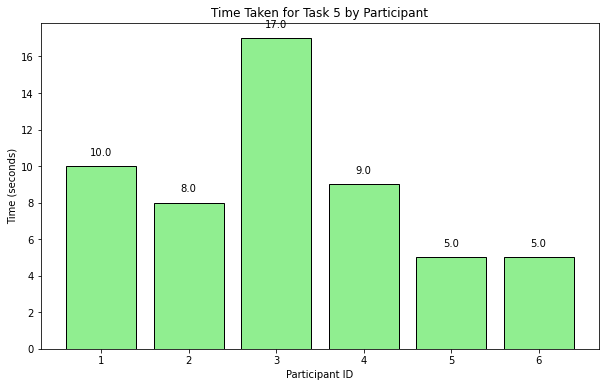

In [61]:
import matplotlib.pyplot as plt

# Plot a bar chart of task times per participant
plt.figure(figsize=(10, 6))
bars = plt.bar(task5_data['test_id'], task5_data['task-5-time'], edgecolor='black', color='lightgreen')
plt.title('Time Taken for Task 5 by Participant')
plt.xlabel('Participant ID')
plt.ylabel('Time (seconds)')
plt.xticks(task5_data['test_id'])

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.5, f'{yval:.1f}', ha='center', va='bottom')

plt.show()


Responses to: Were you able to find the global leaderboard quickly?
Yes    6
Name: task-5-q1, dtype: int64


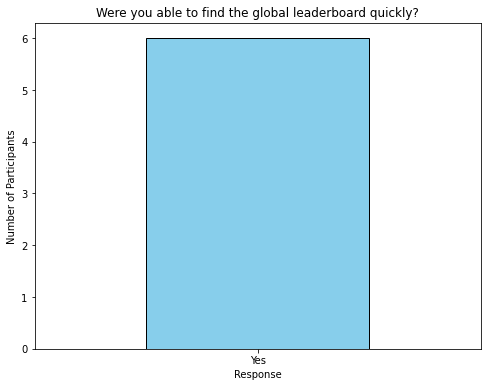


Responses to: Was the ranking information displayed in a way that was easy to understand?
Yes    6
Name: task-5-q2, dtype: int64


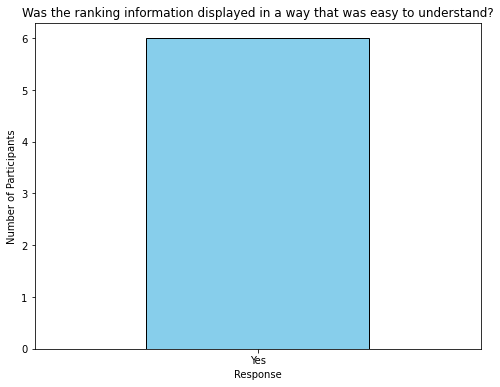


Responses to: Was there anything confusing or unexpected about how the leaderboard was organized?
No    6
Name: task-5-q3, dtype: int64


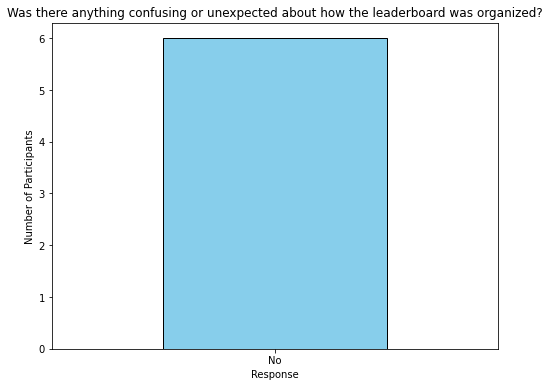

In [55]:
# List of follow-up questions
questions = {
    'task-5-q1': "Were you able to find the global leaderboard quickly?",
    'task-5-q2': "Was the ranking information displayed in a way that was easy to understand?",
    'task-5-q3': "Was there anything confusing or unexpected about how the leaderboard was organized?"
}

for col, question in questions.items():
    print(f"\nResponses to: {question}")
    counts = task5_data[col].value_counts()
    print(counts)
    
    # Plot the responses
    plt.figure(figsize=(8, 6))
    counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(question)
    plt.xlabel('Response')
    plt.ylabel('Number of Participants')
    plt.xticks(rotation=0)
    plt.show()

---
## Task 6: Making Predictions for the Upcoming Race 

### Goal: Evaluate if users can easily access the prediction section and make their predictions for the next Formula 1 race. 

### Instructions: “Please make your predictions for the upcoming Formula 1 race.” 

#### Follow-up Questions: 

- Were you able to find the prediction section for the upcoming race quickly? 

- Was the prediction process easy to understand and complete? 

- Was there anything confusing or unexpected about how the prediction options were presented? 

In [57]:
# Identify Task 6 columns
task6_columns = [col for col in data.columns if col.startswith('task-6')]

# Extract Task 6 data
task6_data = data[['test_id'] + task6_columns]

# Display the first few rows
task6_data.head()

,test_id,task-6-time,task-6-answer,task-6-q1,task-6-q2,task-6-q3
0,1,45,Completed,Yes,Yes,No
1,2,20,Completed,Yes,Yes,No
2,3,26,Completed,Yes,Yes,No
3,4,20,Completed,Yes,Yes,No
4,5,15,Completed,Yes,Yes,No


In [58]:
# Calculate descriptive statistics
task6_time_stats = task6_data['task-6-time'].describe()
print("Descriptive statistics for Task 6 completion time:")
print(task6_time_stats)

Descriptive statistics for Task 6 completion time:
count     6.000000
mean     28.166667
std      12.765840
min      15.000000
25%      20.000000
50%      23.000000
75%      38.750000
max      45.000000
Name: task-6-time, dtype: float64


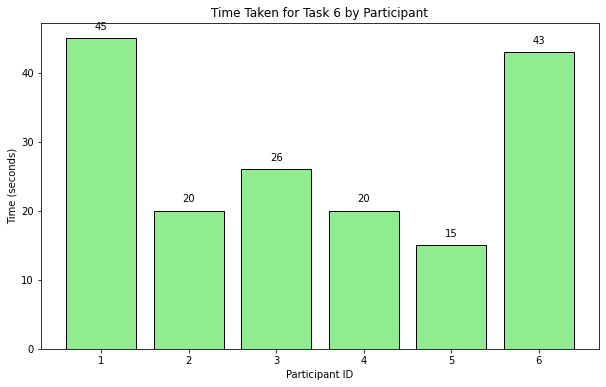

In [60]:
import matplotlib.pyplot as plt

# Plot a bar chart of task times per participant
plt.figure(figsize=(10, 6))
bars = plt.bar(task6_data['test_id'], task6_data['task-6-time'], edgecolor='black', color='lightgreen')
plt.title('Time Taken for Task 6 by Participant')
plt.xlabel('Participant ID')
plt.ylabel('Time (seconds)')
plt.xticks(task6_data['test_id'])

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 1, f'{yval:.0f}', ha='center', va='bottom')

plt.show()


Responses to: Were you able to find the prediction section for the upcoming race quickly?
Yes    6
Name: task-6-q1, dtype: int64


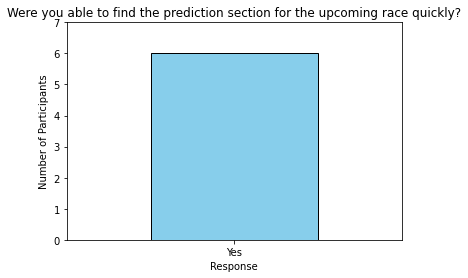


Responses to: Was the prediction process easy to understand and complete?
Yes    6
Name: task-6-q2, dtype: int64


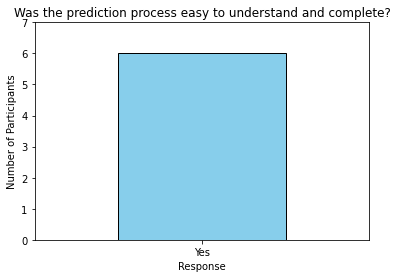


Responses to: Was there anything confusing or unexpected about how the prediction options were presented?
No    6
Name: task-6-q3, dtype: int64


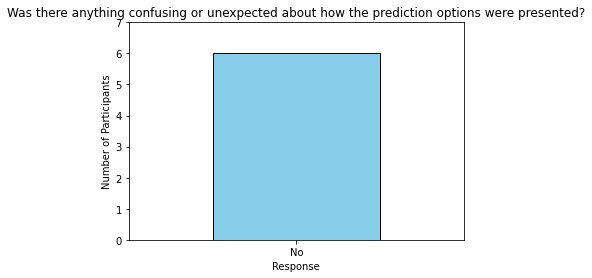

In [62]:
# List of follow-up questions
questions = {
    'task-6-q1': "Were you able to find the prediction section for the upcoming race quickly?",
    'task-6-q2': "Was the prediction process easy to understand and complete?",
    'task-6-q3': "Was there anything confusing or unexpected about how the prediction options were presented?"
}

for col, question in questions.items():
    print(f"\nResponses to: {question}")
    counts = task6_data[col].value_counts()
    print(counts)

    # Plot the responses
    plt.figure(figsize=(6, 4))
    counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(question)
    plt.xlabel('Response')
    plt.ylabel('Number of Participants')
    plt.xticks(rotation=0)
    plt.ylim(0, max(counts)+1)
    plt.show()

---
## Task 7: Viewing the Ranking of the TUD League and Alan’s Predictions for the Spanish Grand Prix 

### Goal: Assess if users can easily view the ranking in the TUD league and locate Alan's predictions specifically for the Spanish Grand Prix. 

### Instructions: “Please go to the league section, select the TUD league, and view the ranking. Then, find Alan’s predictions for the Spanish Grand Prix. Describe all the information displayed, such as Alan’s predicted finishing positions and any other relevant stats or details.” 

#### Follow-up Questions: 

- Were you able to find the TUD league ranking easely? 

- Were you able to find Alan's predictions for the Spanish Grand Prix easely? 

- Was the information about the league ranking and Alan's predictions presented in an easy-to-understand format? 

- What do the colours mean (red/orange/green)? 

- If you want to see the points earned by all the members of the league in a specific race, how will you do it? 

- If you want to see the points earned by all the members of the league in all the season, how will you do it? 

- Was there anything confusing or unexpected about how the league ranking or predictions were organized? 

In [63]:
# Identify Task 7 columns
task7_columns = [col for col in data.columns if col.startswith('task-7')]

# Extract Task 7 data
task7_data = data[['test_id'] + task7_columns]

# Display the first few rows
task7_data.head()

,test_id,task-7-time,task-7-answer,task-7-q1,task-7-q2,task-7-q3,task-7-q4,task-7-q5,task-7-q6,task-7-q7
0,1,15,Completed,Yes,Yes,Yes,Don't know,Click on the name,Go back to leaderboard,No
1,2,11,Completed,Yes,Yes,Yes,Don't know,Click on the name,Go back to leaderboard,No
2,3,19,Completed,Yes,Yes,Yes,Don't know,Click on the name,Go back to leaderboard,No
3,4,10,Completed,Yes,Yes,Yes,Green=podium. red=winner. fastest lap=orange,Click on the name,Go back to leaderboard,No
4,5,10,Completed,Yes,Yes,Yes,Green=podium. red=winner. fastest lap=orange,Don't know,Go back to leaderboard,No


In [64]:
# Calculate descriptive statistics
task7_time_stats = task7_data['task-7-time'].describe()
print("Descriptive statistics for Task 7 completion time:")
print(task7_time_stats)

Descriptive statistics for Task 7 completion time:
count     6.00000
mean     12.50000
std       3.72827
min      10.00000
25%      10.00000
50%      10.50000
75%      14.00000
max      19.00000
Name: task-7-time, dtype: float64


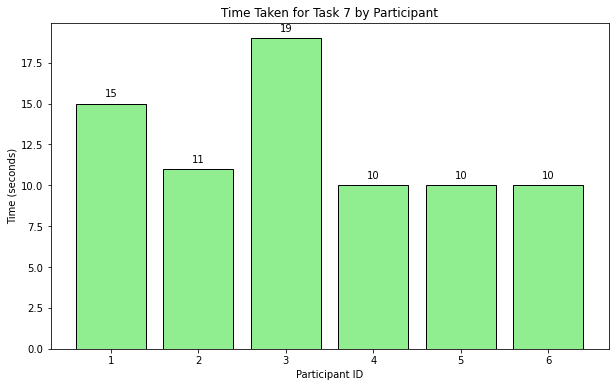

In [65]:
import matplotlib.pyplot as plt

# Plot a bar chart of task times per participant
plt.figure(figsize=(10, 6))
bars = plt.bar(task7_data['test_id'], task7_data['task-7-time'], edgecolor='black', color='lightgreen')
plt.title('Time Taken for Task 7 by Participant')
plt.xlabel('Participant ID')
plt.ylabel('Time (seconds)')
plt.xticks(task7_data['test_id'])

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.3, f'{yval:.0f}', ha='center', va='bottom')

plt.show()


Responses to: Were you able to find the TUD league ranking easily?
Yes    6
Name: task-7-q1, dtype: int64


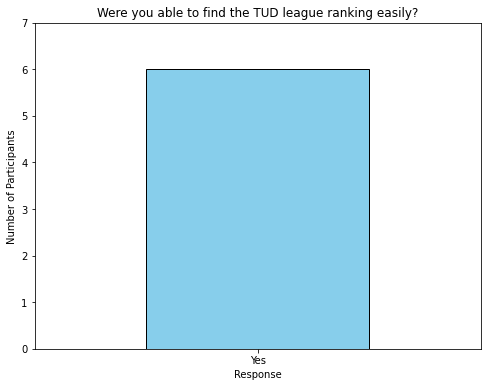


Responses to: Were you able to find Alan's predictions for the Spanish Grand Prix easily?
Yes    6
Name: task-7-q2, dtype: int64


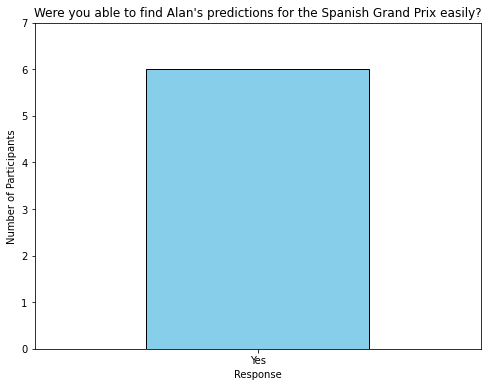


Responses to: Was the information about the league ranking and Alan's predictions presented in an easy-to-understand format?
Yes    6
Name: task-7-q3, dtype: int64


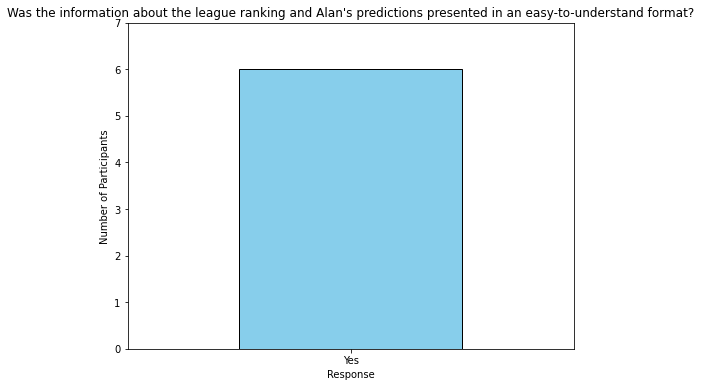


Responses to: Was there anything confusing or unexpected about how the league ranking or predictions were organized?
No    6
Name: task-7-q7, dtype: int64


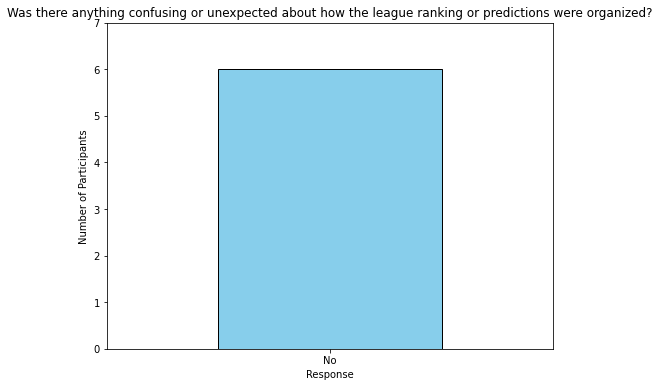


Responses to: What do the colours mean (red/orange/green)?
Participant 1: Don't know
Participant 2: Don't know
Participant 3: Don't know
Participant 4: Green=podium. red=winner. fastest lap=orange
Participant 5: Green=podium. red=winner. fastest lap=orange
Participant 6: Green=podium. red=winner. fastest lap=orange

Responses to: If you want to see the points earned by all the members of the league in a specific race, how will you do it?
Participant 1: Click on the name
Participant 2: Click on the name
Participant 3: Click on the name
Participant 4: Click on the name
Participant 5: Don't know
Participant 6: Click on the name

Responses to: If you want to see the points earned by all the members of the league in all the season, how will you do it?
Participant 1: Go back to leaderboard
Participant 2: Go back to leaderboard
Participant 3: Go back to leaderboard
Participant 4: Go back to leaderboard
Participant 5: Go back to leaderboard
Participant 6: Go back to leaderboard


In [66]:
# Dictionary of Task 7 questions
task7_questions = {
    'task-7-q1': "Were you able to find the TUD league ranking easily?",
    'task-7-q2': "Were you able to find Alan's predictions for the Spanish Grand Prix easily?",
    'task-7-q3': "Was the information about the league ranking and Alan's predictions presented in an easy-to-understand format?",
    'task-7-q4': "What do the colours mean (red/orange/green)?",
    'task-7-q5': "If you want to see the points earned by all the members of the league in a specific race, how will you do it?",
    'task-7-q6': "If you want to see the points earned by all the members of the league in all the season, how will you do it?",
    'task-7-q7': "Was there anything confusing or unexpected about how the league ranking or predictions were organized?"
}

import matplotlib.pyplot as plt

# List of questions with categorical (Yes/No) responses
categorical_questions = ['task-7-q1', 'task-7-q2', 'task-7-q3', 'task-7-q7']

for col in categorical_questions:
    question = task7_questions[col]
    print(f"\nResponses to: {question}")
    counts = task7_data[col].value_counts()
    print(counts)
    
    # Plot the responses
    plt.figure(figsize=(8, 6))
    counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(question, fontsize=12)
    plt.xlabel('Response')
    plt.ylabel('Number of Participants')
    plt.xticks(rotation=0)
    plt.ylim(0, counts.max() + 1)
    plt.show()

# List of open-ended questions
open_ended_questions = ['task-7-q4', 'task-7-q5', 'task-7-q6']

for col in open_ended_questions:
    question = task7_questions[col]
    print(f"\nResponses to: {question}")
    for idx, row in task7_data.iterrows():
        print(f"Participant {row['test_id']}: {row[col]}")


---
## Task 8: Using the Steering-Wheel Feature for Navigation 

### Goal: Determine if the steering-wheel navigation is intuitive and functional. 

### Instructions: “Try using the steering-wheel feature to move between screens. Does it feel natural to navigate this way?” 

#### Follow-up Questions: 

- Was it easy to control the steering wheel? 

- Did you understand how it functioned from the start? 

- Did it add to your engagement or feel unnecessary? 

In [67]:
# Identify Task 8 columns
task8_columns = [col for col in data.columns if col.startswith('task-8')]

# Extract Task 8 data
task8_data = data[['test_id'] + task8_columns]

# Display the first few rows
task8_data.head()

,test_id,task-8-time,task-8-answer,task-8-q1,task-8-q2,task-8-q3
0,1,25,Feels natural,Yes,No,Yes it adds to my engagement
1,2,31,Feel a little unnatural,Kind of,Kind of,It's cool
2,3,29,It works well on the left side,Kind of,Yes,It's a nice feature
3,4,15,Feels natural,Yes,No,It's cool
4,5,10,Feels natural,Yes,No,It's cool



Responses to: Was it easy to control the steering wheel?
Yes        4
Kind of    2
Name: task-8-q1, dtype: int64


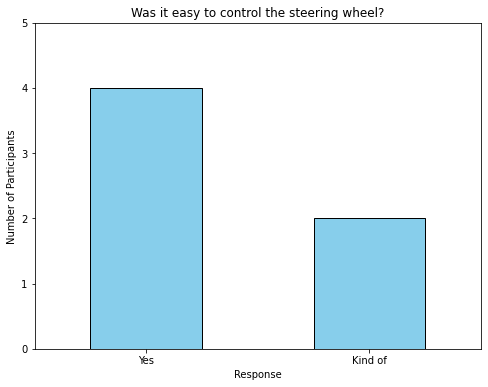


Responses to: Did you understand how it functioned from the start?
No         3
Yes        2
Kind of    1
Name: task-8-q2, dtype: int64


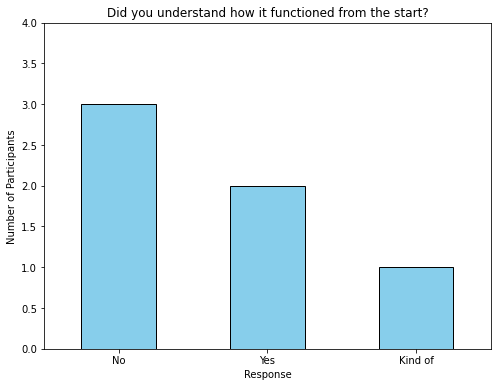


Responses to: Did it add to your engagement or feel unnecessary?
It's cool                       4
Yes it adds to my engagement    1
It's a nice feature             1
Name: task-8-q3, dtype: int64


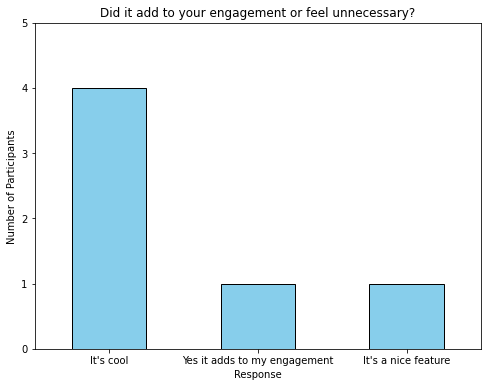

In [68]:
# Dictionary of Task 8 questions
task8_questions = {
    'task-8-q1': "Was it easy to control the steering wheel?",
    'task-8-q2': "Did you understand how it functioned from the start?",
    'task-8-q3': "Did it add to your engagement or feel unnecessary?"
}

import matplotlib.pyplot as plt

for col, question in task8_questions.items():
    print(f"\nResponses to: {question}")
    counts = task8_data[col].value_counts()
    print(counts)
    
    # Plot the responses
    plt.figure(figsize=(8, 6))
    counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(question, fontsize=12)
    plt.xlabel('Response')
    plt.ylabel('Number of Participants')
    plt.xticks(rotation=0)
    plt.ylim(0, counts.max() + 1)
    plt.show()